# Machine Learning
## Part IIb: Supervised Classifier ML

Following up with the machine learning lecture, we will use the Titanic dataset to explore classification supervised machine learning.

### Titanic dataset
The [Titanic dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset/)  contains information on the passenger including name, age, gender, socio-economic class and more. In this notebook we will try to predict which passengers on the boat were more likely to survive.

Dataset fields:
- `PassengerId` - Unique passenger ID
- `Survived` -  Survival where 0 = Not survived, 1 = Survived
- `Pclass` - Passenger class tickets; 1 = 1st class, 2 = 2nd class, 3 = 3rd class
- `Name` - Name of the Passenger. Multiple names and titles included
- `Sex` - Gender
- `Age` - Age in years
- `SibSp` - Number of siblings or spouses aboard the Titanic
- `Parch` - Number of parents or children aboard the Titanic
- `Ticket` - Ticket number
- `Fare` - Passenger fare
- `Cabin`- Cabin number
- `Embarked` - Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
  
Learning outcome
- Applying different feature engineering and feature scaling to the dataset
- Try different classified ML algorithms

In [55]:
### Load libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
gdrive='drive/MyDrive/SJSU/SJSU_Fall2024/CS133_Data-Visualization/week12_ml/'
fp=gdrive+'Titanic-Dataset.csv'

Mounted at /content/drive


In [3]:
titanic = pd.read_csv(fp)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
### Let's check for null values
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Exploratory data analysis
Let's do some data exploration focusing on survival rate (target variable).

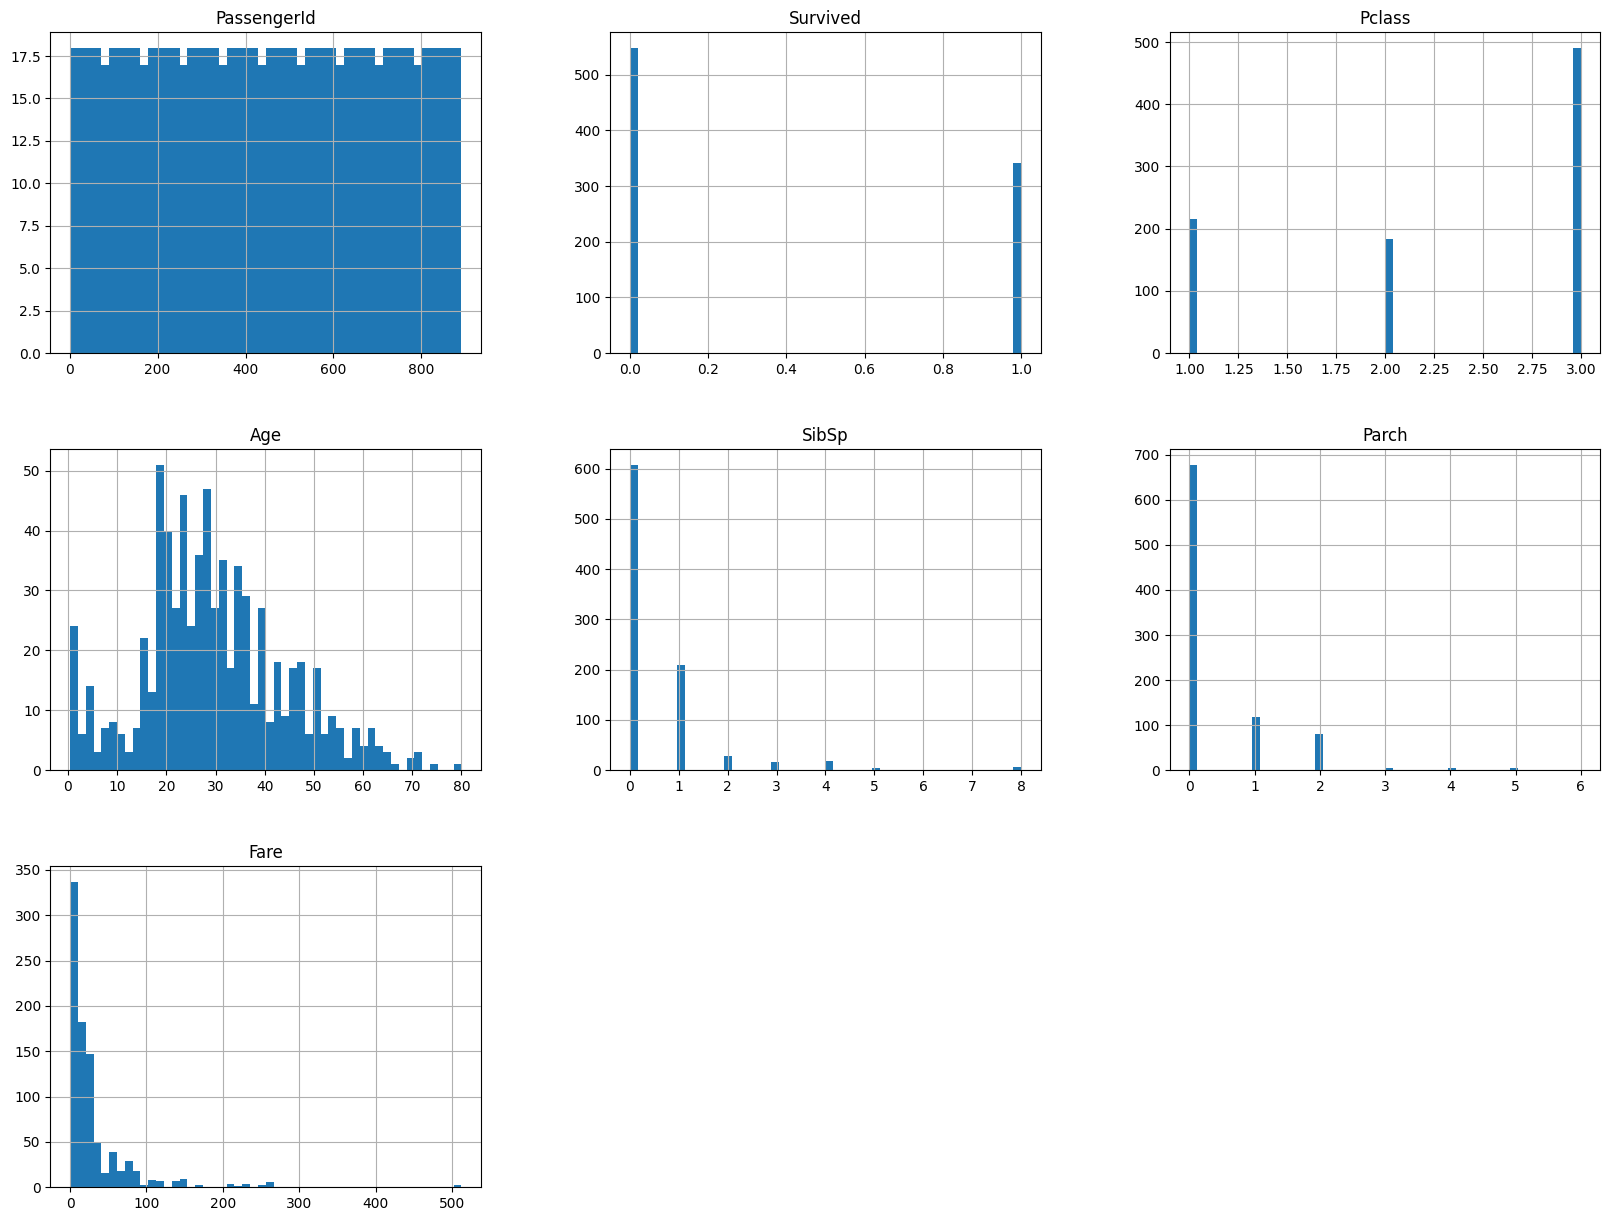

In [6]:
titanic.hist(bins=50, figsize=(20,15))
plt.show()

These histogram plots show us that many of the features are discrete value and not continuous values.

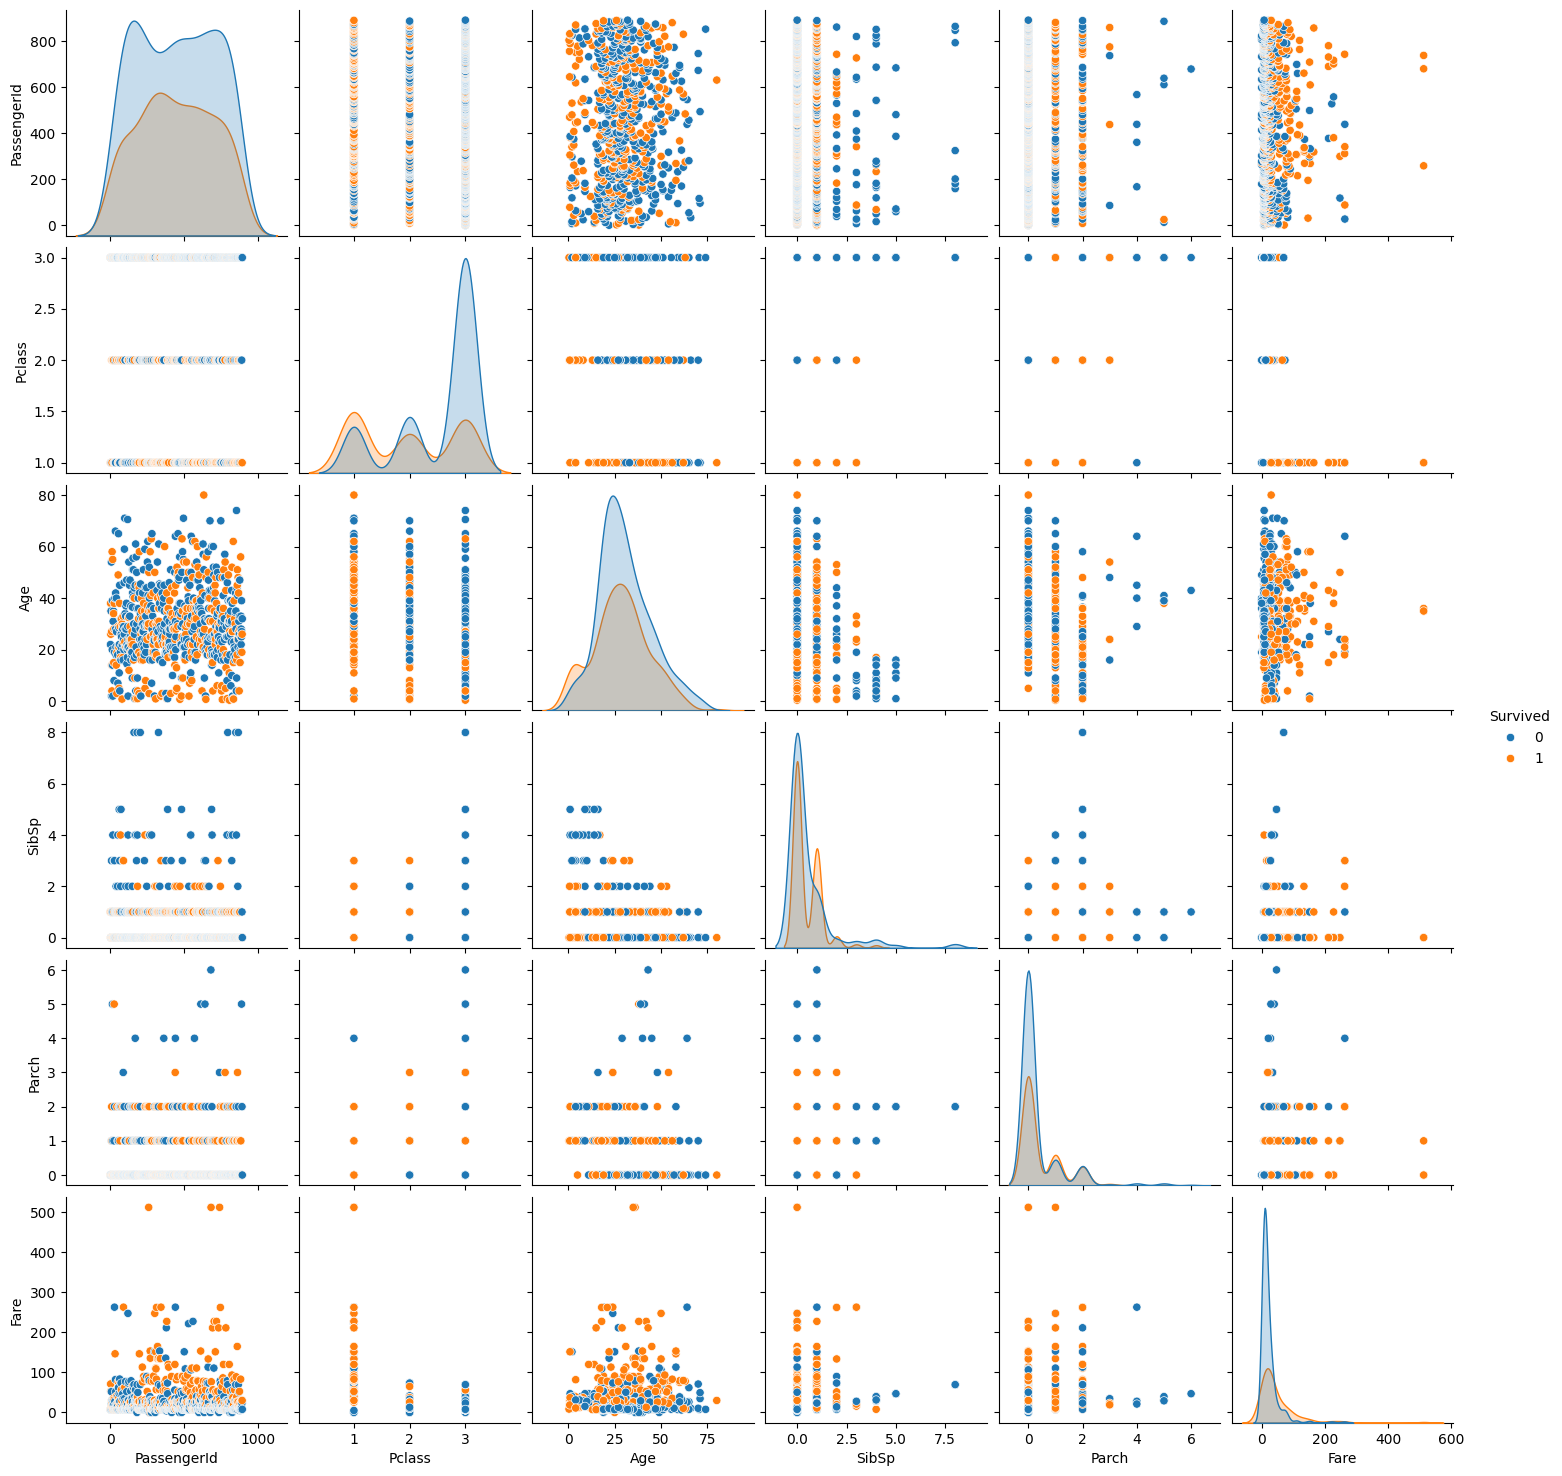

In [7]:
##pair plot
import seaborn as sns
sns.pairplot(titanic, hue='Survived')

Considering that many of these features are discrete datatype, the pairplot does not provide us the same information as we saw in the previous notebook when we have more continuous variable. Let's focus more on some of the discrete features that may be contributing to the Survival rate.

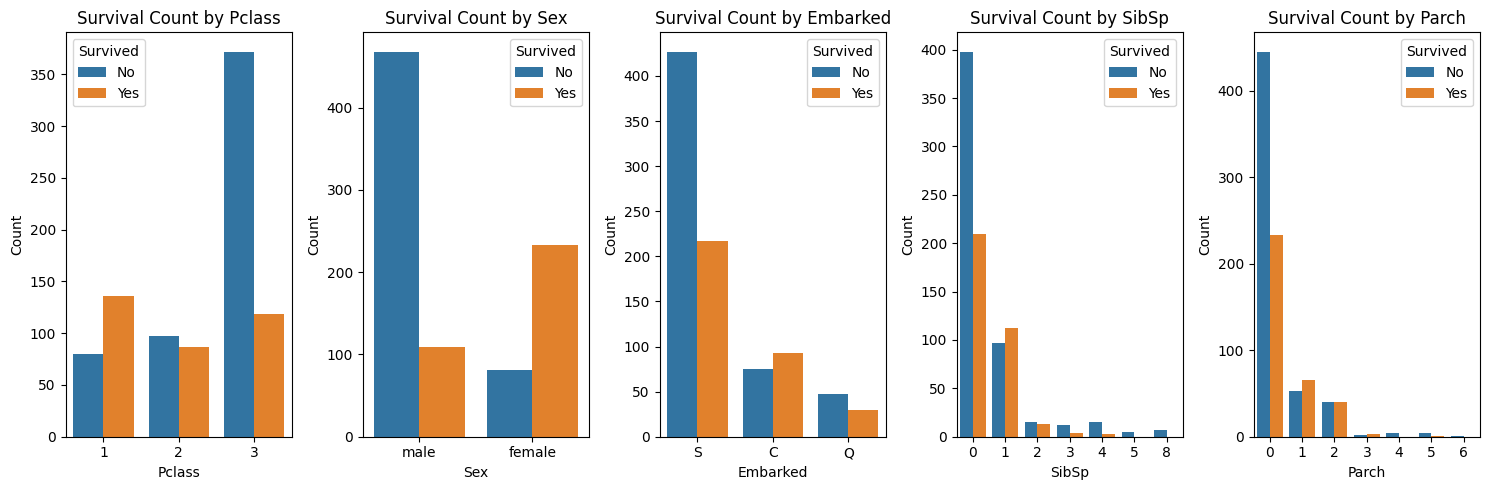

In [8]:
### Plot some of the categorical columns
cat_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(cat_features):
    plt.subplot(1, len(cat_features), i + 1)
    sns.countplot(x=feature, hue='Survived', data=titanic)
    plt.title(f'Survival Count by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution by Survival')

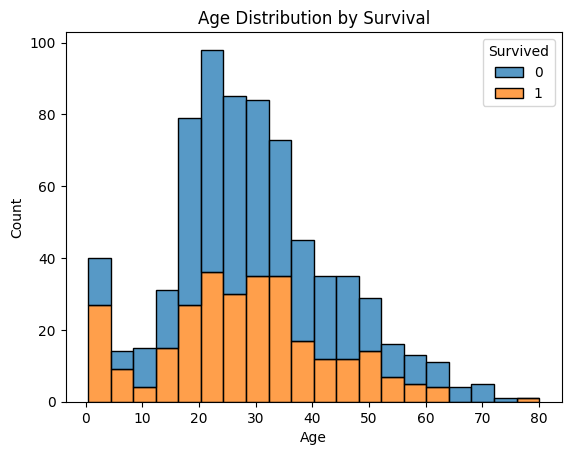

In [9]:
## Since age is a continuous distribution, a histogram will be easier to visualize
## Plot Age distribution by Survival
ax = sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack')
ax.set_title('Age Distribution by Survival')

Based on the plots above, we can start asking questions like does the Class level influence survival rate or does traveling alone or with a love one have more impact on survival rate? We can use the existing features to further engineer to help us make prediction on which passengers were more likely to survive.

# Select features and split the data
**Feature selection**  
Divide given columns into two types of variables dependent(or target variable) and independent variable (or feature variables).

**Splitting Data**  
To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Typically when we select a random set of instances for our model we wil randomly select 20% of our dataset. We set this 20% aside for out test set and train on the remaining 80%.

It is important that the training and test split contain known output from which the model can learn off of. The test set then tests the model's prediction based on what it learned from the training set.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size. Use `stratify=y` to deal with imbalance dataset.

In [10]:
### Clean the dataset of columns that are redundant and do not add to the dataset
titanic_clean = titanic.drop(['PassengerId', 'Ticket'], axis=1)

In [11]:
### Select features and target variables

# titanic.columns
X = titanic_clean.drop('Survived', axis=1) # Features
y = titanic_clean.Survived # Target variable

### Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # stratify=y is useful for imbalanced datasets


In [12]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,NaN,0,0,7.7500,NaN,Q
542,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,31.2750,NaN,S
49,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,17.8000,NaN,S
667,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,7.7750,NaN,S
297,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...
650,3,"Mitkoff, Mr. Mito",male,NaN,0,0,7.8958,NaN,S
744,3,"Stranden, Mr. Juho",male,31.0,0,0,7.9250,NaN,S
265,2,"Reeves, Mr. David",male,36.0,0,0,10.5000,NaN,S
337,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,134.5000,E40,C


### Pre-processing and feature engineering

**Replacing null or zero values**
This dataset had 3 features that had null value; Age, Cabin, and Embarked. We will explor and addrss these columns by imputing them with new values.

**Feature Engineering**  
Another pre-processing task that we can do is feature engineering. An example of that would be to code our data into a numberical vector, where you convert categorical variables to a numerial variable. We do this because many ML algorirthm requires a numerical input.

### Feature engineering
Let's do some different feature engineering of the dataset to make the dataset more optimal for ML algorithms.

**Impute with median value** -   
Let's assume that we use the `Title` column above along with the `Pclass` to guess the `Age` of the passenger. Impute the `Age` median based on Pclass and Title. Then make a new column `AgeGroup` to categorize into different age group; 'Child', 'Teen', 'Adult', 'Middle', 'Senior'.

**Travel is single** -   
Determine if the passenger was traveling alone or with family members. Using the columns `Parch` which is the number of parents/children aboard and `SibSp` which is the number of siblings or spouse aboard to define the  `FamilySize`. Additionally, define if passenger is IsSingle (1) or traveling with family member (0).

**Cabin impute** -  
We assume if the passenger does not have a cabin number that they probably did not have a cabin. Create a column `HasCabin` to define if the passenger had a cabin (1) or not (0) based on `Cabin`.

**Define `Fare` value and bin into categories** -   
Group on `Pclass` to get the median value. Impute NaN with the median value based on `Pclass`. Use the `Fare` value and bin into different category

**Fill in NaN data for `Embarked`** -   
Assuming that different Embarked had different Passenger class, we will group by Pclass and use mode to replace missing data.

In [13]:
### Extract titles into new column 'Title' from 'Name'
X_train['Title'] = X_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    #     # .str.extract() - String method to extract patterns
    #     # ' ([A-Za-z]+)\.' - Regular expression pattern
    #         # ' ' - Matches a space
    #         # [A-Za-z]+ - Matches one or more uppercase/lowercase letters
    #         # \. - Matches a literal dot (period)
    #         # The parentheses () capture the part we want to keep
    #     # expand=False - Returns a Series instead of DataFrame

## Group rare titles
title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Rare', 'Sir': 'Rare',
        'Mme': 'Mrs', 'Don': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare',
        'Jonkheer': 'Rare', 'Dona': 'Rare'
    }

X_train['Title'] = X_train['Title'].map(title_mapping)

In [14]:
### Impute Age with median based on Pclass and Title
X_train['Age'] = X_train.groupby(['Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

### Bin Age
X_train['AgeGroup'] = pd.cut(X_train['Age'],
                                 bins=[0, 12, 18, 35, 60, 100],
                                 labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

In [15]:
### Define the size of the family using SibSp and Parch features
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1

### Is the passenger alone? If FamilySize is 1, the comparison is True
X_train['IsAlone'] = (X_train['FamilySize'] == 1).astype(int)

In [16]:
### Define HasCabin. If Cabin is not NaN, the comparison is True
X_train['HasCabin'] = X_train['Cabin'].notna().astype(int)

In [17]:
### Define Fare value based on Pclass median value
## Calculate the median 'Fare' for each 'Pclass'
median_fares_by_pclass = X_train.groupby('Pclass')['Fare'].median()
## Fill NaN values in 'Fare' using the median fares mapped by 'Pclass'
X_train['Fare'] = X_train['Fare'].fillna(X_train['Pclass'].map(median_fares_by_pclass))

## Alternatively use lamba
# X_train['Fare'] = X_train.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [18]:
### Bin Fare into low, medium, and high bin
X_train['FareCat'] = pd.qcut(X_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [19]:
## Find the rows with NaN in Embarked column. Fill in NaN data for Embarked
X_train_missing = X_train[(X_train['Embarked'] != 'S') &
                          (X_train['Embarked'] != 'Q') &
                          (X_train['Embarked'] != 'C')
                          ]

X_train_missing = X_train_missing.index
X_train.loc[X_train_missing, 'Embarked'] = X_train.groupby('Pclass')['Embarked'].transform(lambda x: x.mode()[0])

In [20]:
### Convert all the different feature engineering we just tested as a function
## to run function on train and test set

def fxn_engineering(df):
  df_fe = df.copy()
  df_fe['Title'] = df_fe['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
  title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Rare', 'Sir': 'Rare',
        'Mme': 'Mrs', 'Don': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare',
        'Jonkheer': 'Rare', 'Dona': 'Rare'
  }
  df_fe['Title'] = df_fe['Title'].map(title_mapping)

  df_fe['Age'] = df_fe.groupby(['Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))
  df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

  df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1
  df_fe['IsAlone'] = (df_fe['FamilySize'] == 1).astype(int)

  df_fe['HasCabin'] = df_fe['Cabin'].notna().astype(int)

  df_fe['Fare'] = df_fe.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

  df_fe['FareCat'] = pd.qcut(df_fe['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

  df_embarked_missing = df_fe[(df_fe['Embarked'] != 'S') & (df_fe['Embarked'] != 'Q') & (df_fe['Embarked'] != 'C')]
  df_embarked_missing = df_embarked_missing.index
  df_fe.loc[df_embarked_missing, 'Embarked'] = df_fe.groupby('Pclass')['Embarked'].transform(lambda x: x.mode()[0])

  return df_fe

In [32]:
### Run fxn_engineering() on the training
X_train_fe = fxn_engineering(X_train)
X_test_fe = fxn_engineering(X_test)

In [33]:
### Drop the redundant column
redunant_features = ['Name', 'Age', 'Cabin', 'Fare', 'Title']
X_train_fe = X_train_fe.drop(columns=redunant_features)
X_test_fe = X_test_fe.drop(columns=redunant_features)

In [34]:
X_train_fe.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FamilySize,IsAlone,HasCabin,FareCat
368,3,female,0,0,Q,Teen,1,1,0,Low
542,3,female,4,2,S,Child,7,0,0,High
49,3,female,1,0,S,Teen,2,0,0,High
667,3,male,0,0,S,Adult,1,1,0,Low
297,1,female,1,2,S,Child,4,0,1,Very High


### Encode categorical variable
Now that we have created some Categorical columns, we can apply one-hot encoding

In [36]:
### One-hot encoding for categorical variables
def encode(df):
  encode = pd.get_dummies(df,
                 columns=['Sex', 'Embarked', 'AgeGroup', 'FareCat'],
                 drop_first=True)
  encode = encode.astype(int)
  return encode

### Apply one-hot encode
X_train_fe_enc = encode(X_train_fe)
X_test_fe_enc = encode(X_test_fe)

## Feature Scaling
Standardized values using mean value. This is done by subtracting by the mean valuea and then divide by the standard deviation so that the resulting distribution has unit variance. (See the JN20_ML-transforming-preparing-data notebook for more details)

In [37]:
### Separate out the numerical columns
X_train_fe_enc_num = X_train_fe_enc.select_dtypes(include=['int64', 'float64'])
X_test_fe_enc_num = X_test_fe_enc.select_dtypes(include=['int64', 'float64'])

### Scale the numerical columns
scaler = StandardScaler()
## Fit the scaler only on the training data and transform it
X_train_fe_scaled = scaler.fit_transform(X_train_fe_enc_num)
## Transform the test data using the scaler fitted on the training data
X_test_fe_scaled = scaler.transform(X_test_fe_enc_num)

In [40]:
X_train_fe_scaled

array([[ 0.8362997 , -0.46487255, -0.48246579, ..., -0.56653751,
        -0.58167505, -0.57302549],
       [ 0.8362997 ,  3.11338965,  1.98001193, ..., -0.56653751,
         1.71917293, -0.57302549],
       [ 0.8362997 ,  0.429693  , -0.48246579, ..., -0.56653751,
         1.71917293, -0.57302549],
       ...,
       [-0.34984649, -0.46487255, -0.48246579, ...,  1.76510819,
        -0.58167505, -0.57302549],
       [-1.53599268, -0.46487255, -0.48246579, ..., -0.56653751,
        -0.58167505,  1.74512307],
       [ 0.8362997 , -0.46487255, -0.48246579, ...,  1.76510819,
        -0.58167505, -0.57302549]])

### Selecting supervised machine learning models
Since the target variable for this dataset is a discrete value, classification models will be the preferred model over regressor models.

Because we had done a lot of feature engineering and feature scaling, we will need to revisit our dataframe to check to see if there are columns that are eithr redundant or not of importance.

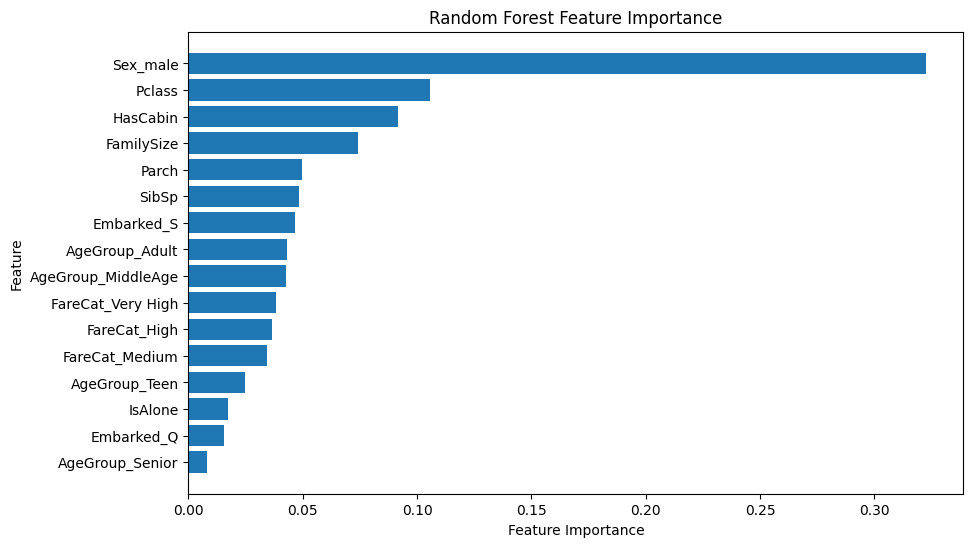

In [39]:
### Checking to see the importance of all the features
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_fe_enc, y_train)

rf.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': X_train_fe_enc.columns,
    'Importance': rf.feature_importances_
})

feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

## Logistic regression model




In [59]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report
)

log_reg = LogisticRegression(random_state=42, max_iter=5000)

param_grid = {
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, "balanced"]
    }

best_log = GridSearchCV(log_reg,
                        param_grid,
                        cv=5,
                        scoring='accuracy',
                        refit='accuracy',
                        n_jobs=-1,
                        error_score='raise'
                        )
best_log.fit(X_train_fe_scaled, y_train)
logreg_y_pred = best_log.predict(X_test_fe_scaled)
print("Best parameters for logistic regression:", best_log.best_params_)
print("Best CV score for logistic regression:", best_log.best_score_)

### AUC to test performance of classification model
log_auc = roc_auc_score(y_test, logreg_y_pred)
print(f"Test AUC for logistic regression: {log_auc:.4f}")
print(classification_report(y_test, logreg_y_pred))

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8103220722939032
Test AUC: 0.7933
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



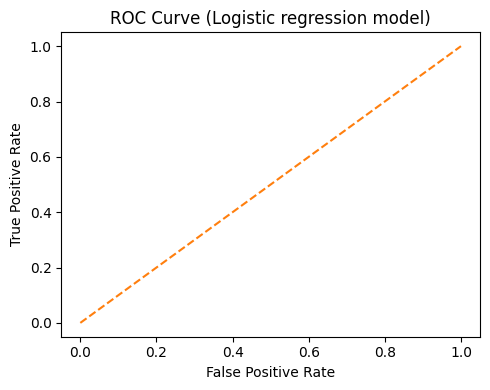

In [48]:
### Visualization
plt.figure(figsize=(5,4))
plt.plot(log_auc, linewidth=2)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic regression model)")
plt.tight_layout()
plt.show()

### K-Neighbors classification


In [50]:
from sklearn.neighbors import KNeighborsClassifier

### Create Decision Tree classifer object
kn = KNeighborsClassifier()

### Train Decision Tree Classifer
kn = kn.fit(X_train_fe_scaled, y_train)

#Predict the response for test dataset
kn_y_pred = kn.predict(X_test_fe_scaled)

**Evaluating the Model**  
Let's estimate how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.
  
Accuracy found classification rate of 83.80%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

In [52]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct? Returns a fraction of correctly classified samples
print("Accuracy with KNN:", accuracy_score(y_test, kn_y_pred, normalize=True))

Accuracy: 0.8379888268156425


# Decision tree classifier model


`random_state` is a "seed" number for the random generator to ensure that the same training and test sets across different executions. The int value used does not matter.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

### Parameter for Decision tree
param_dist = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ["gini", "entropy"]
}

## Create a Decision tree classifier
dtc = DecisionTreeClassifier(random_state=42) #default n_estimator is 100

## Use random search to find optimal hyperparameters
random_search = RandomizedSearchCV(dtc,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   n_jobs=-1, random_state=42) #n_jobs=-1: use all available CPU cores

# Fit random search to the training data
random_search.fit(X_train_fe_scaled, y_train)

## Best model for random forest
best_dtc = random_search.best_estimator_
print("Optimal hyperparameters for decission tree:", random_search.best_params_)

## Fit the best model to the testing data
dtc_y_pred = best_dtc.predict(X_test_fe_scaled)

## Evaluate the model with accuracy
print("Accuracy with Decision tree:", accuracy_score(y_test, dtc_y_pred, normalize=True))

Optimal hyperparameters for decission tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
Accuracy with Decision tree: 0.8379888268156425


## SVM

In [61]:
from sklearn.svm import SVC

### SVM classifier object
svm = SVC(random_state=42) #default n_estimator is 100

## Run model
svm.fit(X_train_fe_scaled, y_train)
diabetes_predictions = svm.predict(X_test_fe_scaled)


In [62]:
from sklearn.svm import SVC

### SVM classifier object
svm = SVC(random_state=42) #default n_estimator is 100'

svm_param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

## Use random search to find optimal hyperparameters
svm_random_search = RandomizedSearchCV(svm,
                                   param_distributions=svm_param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   n_jobs=-1, random_state=42) #n_jobs=-1: use all available CPU cores

# Fit random search to the training data
svm_random_search.fit(X_train_fe_scaled, y_train)

## Best model for random forest
best_svm = svm_random_search.best_estimator_
print("Optimal hyperparameters:", svm_random_search.best_params_)

## Fit the best model to the testing data
svm_y_pred = best_svm.predict(X_test_fe_scaled)

## Evaluate SVM model
print("Accuracy with SVM:", accuracy_score(y_test, svm_y_pred, normalize=True))

Optimal hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 10}
Accuracy with SVM: 0.8268156424581006


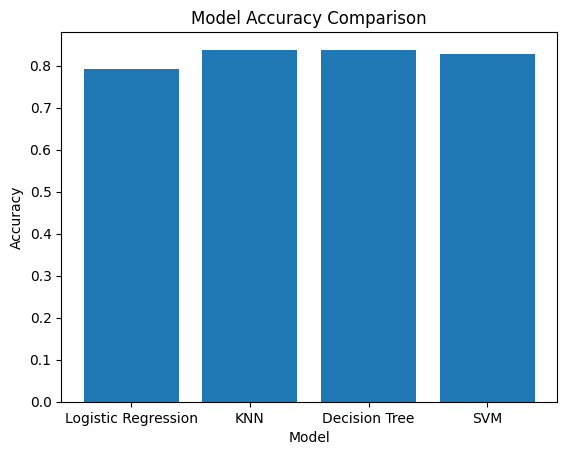

In [64]:
### Build a dataframe with all the accuracy scores to plot
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [log_auc, accuracy_score(y_test, kn_y_pred, normalize=True), accuracy_score(y_test, dtc_y_pred, normalize=True), accuracy_score(y_test, svm_y_pred, normalize=True)]
})

plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()